In [1]:
import pandas as pd
import duckdb
import seaborn as sns
from matplotlib import pyplot as plt

# What is the churn rate for users with Yearly subscriptions?
Assuming that churn is defined as an unsubscription within the first year.

In [2]:
users_subscriptions = pd.read_csv('../files/users_subscriptions.csv', encoding='utf-8', sep=';')

In [90]:
qry = """
    WITH cte_only_yearly_subs AS (
        SELECT 
            *
            , COALESCE(subscription_end_at, CURRENT_DATE) < DATE_ADD(CAST(subscription_start_at AS DATE), INTERVAL 1 YEAR) AS is_churn
        FROM
            users_subscriptions
        WHERE
            subscription_id IS NOT NULL
            AND subscription_type = 'Yearly'
    )

    SELECT 
        SUM(IF(is_churn = TRUE, 1, 0)) / COUNT(subscription_id) AS churn_rate
    FROM
        cte_only_yearly_subs
    
"""

churn_rate = duckdb.query(qry).df().squeeze()

print(f'The churn rate of Yearly subscriptions is {round(churn_rate * 100, 1)}%')

The churn rate of Yearly subscriptions is 39.7%


In [120]:
qry = """
    WITH cte_only_yearly_subs AS (
        SELECT 
            *
            , COALESCE(subscription_end_at, CURRENT_DATE) < DATE_ADD(CAST(subscription_start_at AS DATE), INTERVAL 1 YEAR) AS is_churn
        FROM
            users_subscriptions
        WHERE
            subscription_id IS NOT NULL
            AND subscription_type = 'Yearly'
    )

    SELECT
        platform
        , COUNT(subscription_id) AS total_subs
        , SUM(IF(is_churn = TRUE, 1, 0)) AS churned_subs
        , SUM(IF(is_churn = TRUE, 1, 0)) / COUNT(subscription_id) AS churn_rate
    FROM
        cte_only_yearly_subs
    GROUP BY
        platform
        
    
"""

print('Churn rate by Platform')
duckdb.query(qry).df()

Churn rate by Platform


,platform,total_subs,churned_subs,churn_rate
0,iOS,2277,889.0,0.390426
1,Android,1119,435.0,0.388740
2,Desktop,372,171.0,0.459677


In [119]:
qry = """
    WITH cte_only_yearly_subs AS (
        SELECT 
            *
            , COALESCE(subscription_end_at, CURRENT_DATE) < DATE_ADD(CAST(subscription_start_at AS DATE), INTERVAL 1 YEAR) AS is_churn
        FROM
            users_subscriptions
        WHERE
            subscription_id IS NOT NULL
            AND subscription_type = 'Yearly'
    )

    SELECT
        app_version
        , COUNT(subscription_id) AS total_subs
        , SUM(IF(is_churn = TRUE, 1, 0)) AS churned_subs
        , SUM(IF(is_churn = TRUE, 1, 0)) / COUNT(subscription_id) AS churn_rate
    FROM
        cte_only_yearly_subs
    GROUP BY
        app_version
    ORDER BY
        app_version
        
    
"""

print('Churn rate by App Version')
duckdb.query(qry).df()

Churn rate by App Version


,app_version,total_subs,churned_subs,churn_rate
0,4.51.0,342,133.0,0.388889
1,4.52.0,611,234.0,0.382979
2,4.53.0,759,293.0,0.386034
3,4.54.0,965,391.0,0.405181
4,4.55.0,1091,444.0,0.406966


In [114]:
qry = """
    WITH cte_only_yearly_subs AS (
        SELECT 
            *
            , COALESCE(subscription_end_at, CURRENT_DATE) < DATE_ADD(CAST(subscription_start_at AS DATE), INTERVAL 1 YEAR) AS is_churn
        FROM
            users_subscriptions
        WHERE
            subscription_id IS NOT NULL
            AND subscription_type = 'Yearly'
    )

    SELECT
        platform
        , app_version
        , COUNT(subscription_id) AS total_subs
        , SUM(IF(is_churn = TRUE, 1, 0)) AS churned_subs
        , SUM(IF(is_churn = TRUE, 1, 0)) / COUNT(subscription_id) AS churn_rate
    FROM
        cte_only_yearly_subs
    GROUP BY
        platform
        , app_version
        
    
"""

to_corr_df = duckdb.query(qry).df()
to_corr_df.tail()

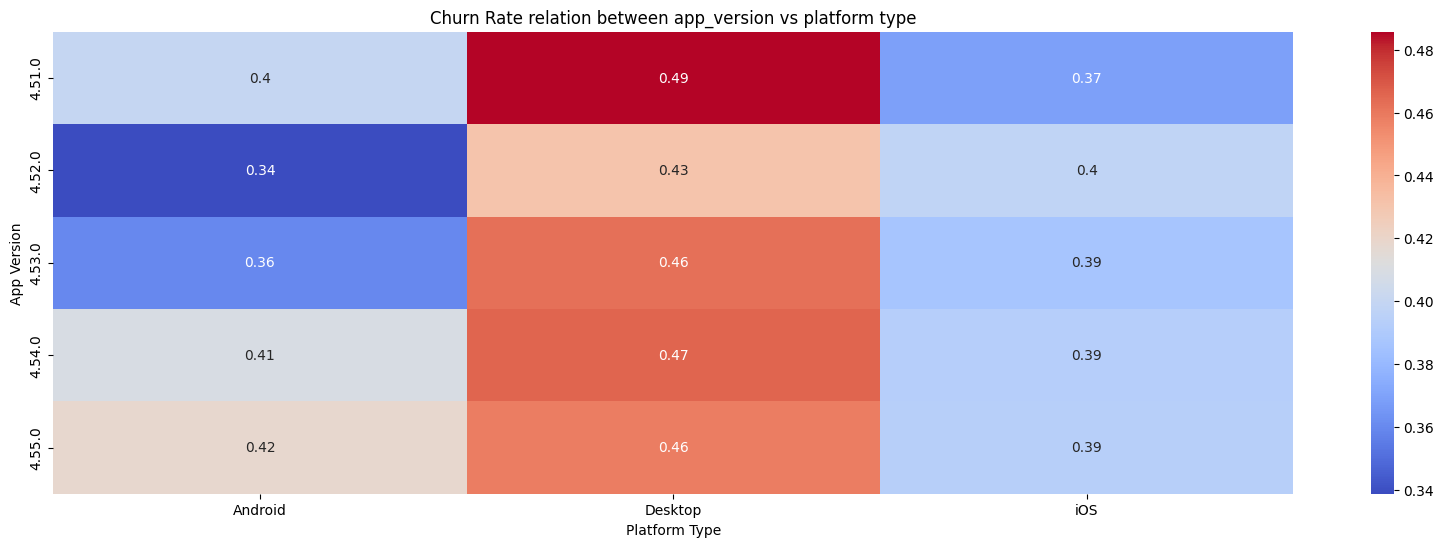

In [93]:
df = to_corr_df.pivot_table(values='churn_rate', index='app_version', columns='platform')


plt.figure(figsize=(20,6))
sns.heatmap(df, annot=True, cmap='coolwarm')


plt.title('Simple Heatmap')
plt.title('Churn Rate relation between app_version vs platform type')
plt.xlabel('Platform Type')
plt.ylabel('App Version')
plt.show()


The Yearly customers that use the app on Desktop have higher churn rate levels. 
It can indicate an inefficiency in usability on Desktops.

On the other hand, the churn rates in the iOS platform are better. 


In addition, on Android, there are two versions with relatively good churn rate levels, and these are not the newer ones. It can indicate a worsening in usability for Android users on the latest versions, or even a new bug.

# Final Answer:
The overall churn rate of Yearly subscriptions is 39.7%

As we can see in the table below, the churn rate of Yearly subscribers is higher for those that use the app on Desktop.


<table>
  <tr>
    <th>Platform Type</th> 
    <th>Churn Rate</th>
  </tr>
  <tr>
    <td>Desktop</td>
    <td>45.9%</td>
  </tr>
  <tr>
    <td>iOS</td>
    <td>39.0%</td>
  </tr>
  <tr>
    <td>Android</td>
    <td>38.8%</td>  
  </tr>
</table>


It can be nice to incentivize users to use the app on Mobile

---

At the same time, as we can see below, over the new app versions, the churn rate has increased. It could have happened due to some new heavy features that have been launched in the newer versions that made the app slow or something like that.

It can be nice to work on app usability to improve this.

<table>
  <tr>
    <th>App Version</th> 
    <th>Churn Rate</th>
  </tr>
  <tr>
    <td>4.51.0</td>
    <td>38.8%</td>
  </tr>
  <tr>
    <td>4.52.0</td>
    <td>38.3%</td>
  </tr>
  <tr>
    <td>4.53.0</td>
    <td>38.6%</td>  
  </tr>
  <tr>
    <td>4.54.0</td>
    <td>40.5%</td>  
  </tr>
  <tr>
    <td>4.55.0</td>
    <td>40.7%</td>  
  </tr>
</table>